Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

Loading Data

In [2]:
# Use loadmat to load matlab files
mat=loadmat('ex4/ex4data1.mat')

# mat is a dict with key "X" for x-values, and key "y" for y values
X=mat["X"]
y=mat["y"]

In [3]:
weights = loadmat('ex4/ex4weights.mat')

In [4]:
T1, T2 = weights['Theta1'], weights['Theta2']

In [5]:
T1.shape, T2.shape

((25, 401), (10, 26))

Predictions

In [6]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [7]:
def predict(Theta1, Theta2, X):
    X = np.hstack((np.ones((X.shape[0],1)),X))
    z2 = sigmoid(X @ Theta1.T)
    z2 = np.hstack((np.ones((z2.shape[0],1)),z2))
    z3 = z2 @ Theta2.T
    return np.argmax(z3, axis=1)+1

In [8]:
pred = predict(T1, T2, X)

In [9]:
print("Training Set Accuracy:",sum(pred[:,np.newaxis]==y)[0]/5000*100,"%")

Training Set Accuracy: 97.52 %


Cost Function for the Neural Net

In [10]:
def CostFuncNeuralNet(Theta1, Theta2, X, y, num_labels, lambda1):
    m = len(y)
    X = np.hstack((np.ones((X.shape[0],1)),X))
    z2 = X @ Theta1.T
    a2 = sigmoid(z2)
    a2 = np.hstack((np.ones((a2.shape[0],1)),a2))
    z3 = a2 @ Theta2.T
    a3 = sigmoid(z3)
    J = 0
    t3 = lambda1/(2*m) * (np.sum(np.sum(Theta1**2, axis=1)) + np.sum(np.sum(Theta2**2, axis=1)))
    l3 = np.ones((5000,1))
    for i in range(1,num_labels+1):
        fake_ds = np.where(y==i, 1, 0)
        t1 = -(fake_ds * np.log(a3[:, i-1][:, np.newaxis]))
        t2 = -(1 - fake_ds)*(np.log(1 - a3[:, i-1][:, np.newaxis]))
        cost = sum(t1+t2)
        J = J + cost
        diff3 = a3[:, i-1][:, np.newaxis] - fake_ds
        l3 = np.hstack((l3, diff3))
    J = J/m
    J_reg = J + t3
    gz2 = sigmoid(np.hstack((np.ones((m,1)), z2))) * sigmoid(1 - np.hstack(((np.ones((m,1)), z2))))
    l2 = (Theta2.T @ l3[:, 1:].T) * gz2.T
    grad1 = l2[1:, :] @ X
    grad2 = l3[:, 1:].T @ a2
    grad1 = 1/m * grad1
    grad2 = 1/m * grad2
    grad1_reg = grad1 + (lambda1/m) * np.hstack((np.zeros((Theta1.shape[0], 1)), Theta1[:, 1:]))
    grad2_reg = grad2 + (lambda1/m) * np.hstack((np.zeros((Theta2.shape[0], 1)), Theta2[:, 1:]))
    return J, grad1, grad2, J_reg, grad1_reg, grad2_reg

Gradient Descent

In [11]:
e_init1 = np.sqrt(6)/np.sqrt(425)
e_init2 = np.sqrt(6)/np.sqrt(35)
e_init1, e_init2

(0.1188177051572009, 0.4140393356054125)

In [12]:
T1_in = (np.random.rand(25,401) * 2 * e_init1) - e_init1
T2_in = (np.random.rand(10,26) * 2 * e_init2) - e_init2

In [13]:
def GradientDescent(Theta1, Theta2, X, y, num_labels, lambda1, alpha, num_iters):
    J_hist = []
    for i in range(num_iters):
        cost, g1, g2 = CostFuncNeuralNet(Theta1, Theta2, X, y, num_labels, lambda1)[3:]
        Theta1 = Theta1 - (alpha*g1)
        Theta2 = Theta2 - (alpha*g2)
        J_hist.append(cost)
    return Theta1, Theta2, J_hist

In [14]:
T1f, T2f, Jf = GradientDescent(T1_in, T2_in, X, y, 10, 1, 0.8, 800)

In [15]:
Jf[-1]

array([0.49584755])

In [16]:
predf = predict(T1f, T2f, X)

In [17]:
print("Training Set Accuracy:",sum(predf[:,np.newaxis]==y)[0]/5000*100,"%")

Training Set Accuracy: 95.04 %


Plotting the Cost Function

Text(0.5, 1.0, 'Cost function of the Neural Net')

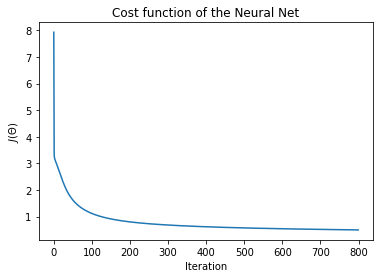

In [26]:
plt.plot(Jf[0:800])
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function of the Neural Net")

Visualizing the Hidden Layer

In [19]:
_ = T1f[:, 1:]
_.shape

(25, 400)

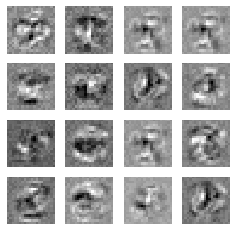

In [22]:
import matplotlib.image as mpimg
fig, axis = plt.subplots(4,4,figsize=(4,4))
for i in range(4):
    for j in range(4):
        axis[i,j].imshow(_[np.random.randint(0,25),:].reshape(20,20,order="F"), cmap="gray") #reshape to 20*20 pixels
        axis[i,j].axis("off")

Rough